## Notebook for comparing DFT & ML predictions for expt validated compounds

**Modified on 4th March, 2023; remodified on 24th February, 2024**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['Arial']
import seaborn as sns
import os, sys
from sklearn.metrics import mean_squared_error
from rdkit.Chem import AllChem, DataStructs, PandasTools
from rdkit import Chem

In [2]:
df = pd.read_excel('../oxstab/emol_expt_measured_022324.xls', sheet_name='emol_expt_measured')
df

,solv_comb_sm,cond_chemprop_25,Eox_chemprop,Eox_chemprop_new,Eox_chemprop_new_uncer,CE_RF,CE_PLSR,Eox_chemprop_uncer,similarity_cond,similarity_ie,...,Eox_DFT,Eox_DFT_new,Eox_expt,Eox_expt_uncer,CE_expt,CE_expt_uncer,name,short_name,prod_id,vendor
0,CCN1CCOCC1,5.765277,4.039314,NaN,NaN,0.982527,NaN,0.012533,NaN,NaN,...,3.817373,NaN,3.70,0.180000,0.7155,0.021100,1 M LiFSA/EM,mol1,A11905,Alfa Aesar
1,COC(=O)C#N,10.097790,8.007362,NaN,NaN,0.987326,NaN,0.121483,0.388889,NaN,...,7.852463,NaN,3.50,0.210000,0.0530,0.011300,1 M LiFSA/MCF,mol2,319813,Sigma Aldrich
2,CCOCCS(F)(=O)=O,2.001988,6.694301,NaN,NaN,0.986423,NaN,0.013183,NaN,NaN,...,6.191821,NaN,4.50,0.170000,0.8890,0.016500,1 M LiFSA/EESF,mol4,E300-6402,Enamine
3,CCS(F)(=O)=O,3.801026,7.330647,NaN,NaN,0.986624,NaN,0.050609,NaN,NaN,...,7.956790,NaN,4.20,0.240000,0.9941,0.013200,1 M LiFSA/ESF,mol3,E300-5313,Enamine
4,CCN1CCOCC1,NaN,NaN,3.867303,0.005669,0.982527,0.972619,NaN,NaN,NaN,...,NaN,4.0945,5.42,0.040000,0.8524,0.015947,2 M LiFSA/EM,mol1,A11905,Alfa Aesar
5,CCOCCS(F)(=O)=O,NaN,NaN,6.861181,0.035119,0.986423,0.988739,NaN,NaN,NaN,...,NaN,6.4362,6.00,0.196554,0.9439,0.008108,2 M LiFSA/EESF,mol4,E300-6402,Enamine
6,CCS(F)(=O)=O,NaN,NaN,7.197885,0.033114,0.986624,0.993486,NaN,NaN,NaN,...,NaN,7.9656,6.00,0.133167,0.9952,0.002300,2 M LiFSA/ESF,mol3,E300-5313,Enamine


In [3]:
ml_ce = df['CE_PLSR'].iloc[4:]
# ml_ce_unc = df['Eox_chemprop_uncer']
expt_ce = df['CE_expt'].iloc[4:]
expt_ce_unc = df['CE_expt_uncer'].iloc[4:]

In [7]:
error_expt_ml = abs(expt_ce - ml_ce) * 100
error_expt_ml

4    12.0219
5     4.4839
6     0.1714
dtype: float64

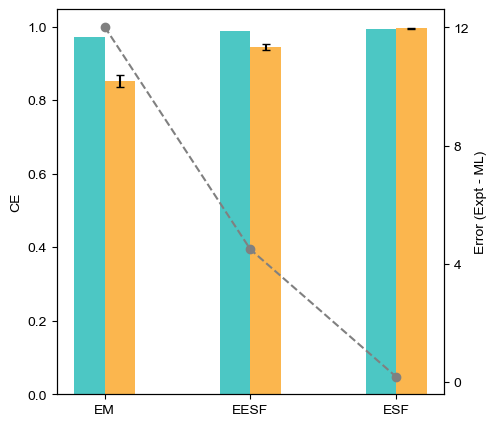

In [14]:
# Set position of bar on X axis
barWidth = 0.125
fig, ax = plt.subplots(figsize=(5,5))
# br1 = np.arange(len(df_),dtype=object)
# br1 = [0, 0.375, 0.75]
br1 = [0, 0.6, 1.2]
br2 = [x + barWidth for x in br1]
# br3 = [x + barWidth for x in br2]
ax.bar(br1, ml_ce, width=barWidth, label='ML', color=(0.298, 0.78, 0.77))  ## original -> teal
ax.bar(br2, expt_ce, width=barWidth, label='Experiments', color=(0.984, 0.713, 0.305), yerr=expt_ce_unc, capsize=3)
# ax.set_aspect(aspect=4)
# plt.legend()
plt.ylabel('CE')
# plt.xticks([r + barWidth/4 for r in range(len(df_))],
        # ['EM', 'EESF', 'ESF'])
plt.xticks([0.0625, 0.6625, 1.2625], ['EM', 'EESF', 'ESF'])

br_ = [x + barWidth/2 for x in br1]
ax2 = ax.twinx()
ax2.scatter(br_, error_expt_ml, color='grey', label='Error (Expt - ML)')
ax2.plot(br_, error_expt_ml, color='grey', linestyle='dashed')
ax2.set_ylabel('Error (Expt - ML)')
ax2.set_yticks([0, 4, 8, 12])
ax2.set_yticklabels([0, 4, 8, 12])
# plt.show()
plt.savefig('ce_expt-ml_022324.eps', dpi=300)